# Import and Explore Data

In [14]:
print()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.precision = 4

import statsmodels.api as sm
import scipy.stats as stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [8]:
conv_data=pd.read_csv('conversion_data.csv')
conv_data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [9]:
conv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
conv_data.describe()

,age,new_user,total_pages_visited,converted
count,316200.0000,316200.0000,316200.0000,316200.0000
mean,30.5699,0.6855,4.8730,0.0323
std,8.2718,0.4643,3.3411,0.1767
min,17.0000,0.0000,1.0000,0.0000
25%,24.0000,0.0000,2.0000,0.0000
50%,30.0000,1.0000,4.0000,0.0000
75%,36.0000,1.0000,7.0000,0.0000
max,123.0000,1.0000,29.0000,1.0000


It is somewhat not real that the viewer is older than age 100, so drop this wrong observation:

In [10]:
conv_data.loc[conv_data.age >= 100,:]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [22]:
# Remove observations with age > 100
conv_data.loc[conv_data.age > 100,:] = np.nan
conv_data.dropna(inplace=True)
conv_data.describe()

,age,new_user,total_pages_visited,converted
count,316198.0000,316198.0000,316198.0000,316198.0000
mean,30.5693,0.6855,4.8729,0.0323
std,8.2690,0.4643,3.3411,0.1767
min,17.0000,0.0000,1.0000,0.0000
25%,24.0000,0.0000,2.0000,0.0000
50%,30.0000,1.0000,4.0000,0.0000
75%,36.0000,1.0000,7.0000,0.0000
max,79.0000,1.0000,29.0000,1.0000


# Distribution

Cool. We already remove wrong values. Now let's see the distributions:

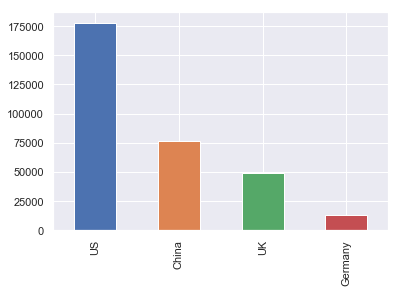

In [15]:
# Countries vs conversion:
country_dist=conv_data['country'].value_counts()
country_dist.plot(kind='bar')

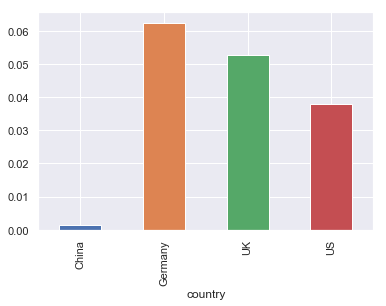

In [16]:
conversion_by_country=conv_data.groupby('country')['converted'].mean()
conversion_by_country.plot(kind='bar')

German and UK has higer converstion rate than US, and the web page did not work well in China.

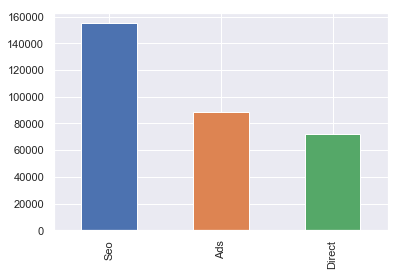

In [17]:
# Sources vs conversion:
source_dist=conv_data['source'].value_counts()
source_dist.plot(kind='bar')

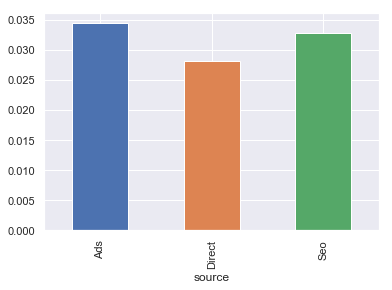

In [18]:
conversion_by_source=conv_data.groupby('source')['converted'].mean()
conversion_by_source.plot(kind='bar')

Source Ads surprisingly has similar conversion rate as Source Seo, which has the largest number in this datasets.

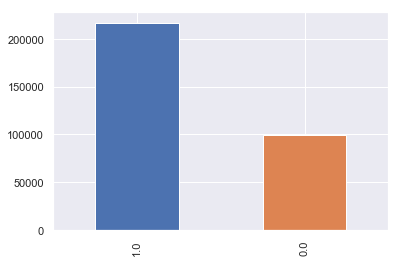

In [19]:
# New users vs conversion
new_user_dist=conv_data['new_user'].value_counts()
new_user_dist.plot(kind='bar')

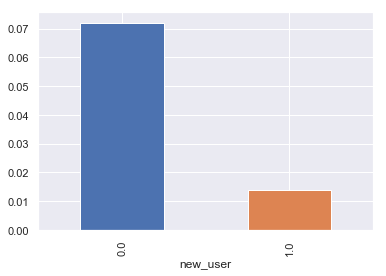

In [20]:
conversion_newuser=conv_data.groupby('new_user')['converted'].mean()
conversion_newuser.plot(kind='bar')

Well, it seems the website is not appealing to new users but returning users.

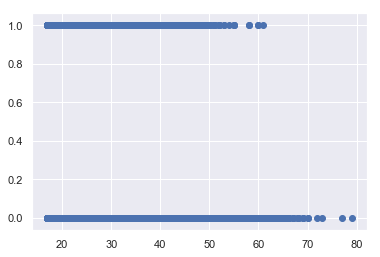

In [21]:
# Age vs conversion
plt.scatter(conv_data.age, conv_data.converted)

# Logistic Regression

In the dataset, 4 attributes are categorical: country, new_user, source and converted. Treat the former 3 variables as independent variables, and the last one is dependent:

In [23]:
x = conv_data.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
x = pd.get_dummies(x)
x

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25.0,1.0,1.0,0,0,1,0,1,0,0
1,23.0,1.0,5.0,0,0,0,1,0,0,1
2,28.0,1.0,4.0,0,0,0,1,0,0,1
3,39.0,1.0,5.0,1,0,0,0,0,0,1
4,30.0,1.0,6.0,0,0,0,1,0,0,1
5,31.0,0.0,1.0,0,0,0,1,0,0,1
6,27.0,1.0,4.0,1,0,0,0,0,0,1
7,23.0,0.0,4.0,0,0,0,1,1,0,0
8,29.0,0.0,4.0,0,0,1,0,0,1,0
9,25.0,0.0,2.0,0,0,0,1,1,0,0


In [24]:
y=conv_data.converted
y.mean()

0.03225194340255157

In [25]:
x_1=sm.add_constant(x)
reg_1=sm.Logit(y,x_1)
result_1=reg_1.fit()

Optimization terminated successfully.
         Current function value: 0.040611
         Iterations 11


In [26]:
result_1.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               316198
Model:                          Logit   Df Residuals:                   316189
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Mar 2019   Pseudo R-squ.:                  0.7150
Time:                        15:48:39   Log-Likelihood:                -12841.
converged:                       True   LL-Null:                       -45053.
                                        LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.8902        nan        nan        nan         nan         nan
age                    -0.0741      0.002    -31.191      0.000      -0.079      -0.069
new_user               -1.7390      0.036    -48.876      0.000      -1.809      -1.669
total_pages_visited     0.7584      0.006    122.092      0.000       0.746       0.771
country_China          -3.8907        nan        nan        nan         nan         nan
country_Germany        -0.0749        nan        nan        nan         nan         nan
country_UK             -0.2807        nan        nan        nan         nan         nan
country_US             -0.6438        nan        nan        nan         nan         nan
source_Ads             -1.5601        nan        nan        nan         nan         nan
source_Direct          -1.7460        nan        nan        nan         nan         nan
source_Seo             -1.5840        nan        nan        nan         nan         nan
=======================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Confusion Matrix

Find the confusion matrix and estimate the model accuracy:

In [27]:
def confusion_matrix(data,actual_values,model):
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [28]:
confusion_matrix(x_1,y,result_1)

(array([[304802.,   1198.],
        [  3169.,   7029.]]), 0.986189033453722)